# Predict Bike Sharing Demand with AutoGluon Template

In [1]:
# IMPORT LIBRARIES
# import os
# from google.colab import drive

In [2]:
# drive.mount('/content/drive')
# os.chdir("drive/MyDrive/Udacity-bike-sharing/project")

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
<!-- ![kaggle1.png](attachment:kaggle1.png) -->
<!-- ![kaggle2.png](attachment:kaggle2.png) -->
2. Scroll down to API and click Create New API Token.
<!-- ![kaggle3.png](attachment:kaggle3.png) -->
<!-- ![kaggle4.png](attachment:kaggle4.png) -->
3. Open up `kaggle.json` and use the username and key.
<!-- ![kaggle5.png](attachment:kaggle5.png) -->

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
# !pip install mxnet-cu102 # GPU version
# !pip install mxnet # CPU version
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)


ERROR: To modify pip, please run the following command:
D:\Users\Sasika\AppData\Local\Programs\Python\Python310\python.exe -m pip install -U pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached mxnet-1.7.0.post2-py2.py3-none-win_amd64.whl (33.1 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached numpy-1.16.6.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached urllib3-1.22-py2.py3-none-any.whl (132 kB)
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.2
    Uninstalling urllib3-2.0.2:
      Successfully uninstalled urllib3-2.0.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to d:\users\sasika\appdata\local\programs\python\python310\lib\site-packages\numpy-1.24.3.dist-info\
   fr

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1985 lines of output]
      Running from numpy source directory.
      D:\System\TEMP\pip-install-1fvgd7lv\numpy_e90d88d6f0f6430890b3a83d57e086e7\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
        return is_string(s) and ('*' in s or '?' is s)
      blas_opt_info:
      blas_mkl_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries mkl_rt not found in ['D:\\Users\\Sasika\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\', 'D:\\Users\\Sasika\\AppData\\Local\\Programs\\Python\\Python310\\libs']
        NOT AVAILABLE
      
      blis_info:
      No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      customize MSVCCompiler
        libraries blis not found in ['D:\\Users\\Sasika\\Ap

     -------------------------------------- 62.6/62.6 kB 844.1 kB/s eta 0:00:00
     ------------------------------------ 143.1/143.1 kB 777.0 kB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.22
    Uninstalling urllib3-1.22:
      Successfully uninstalled urllib3-1.22
  Attempting uninstall: requests
    Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

The syntax of the command is incorrect.
'touch' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "sasikaamarasinghe"
kaggle_key = "0d240420b7801e89dcab68e7feaa4514"

# # # Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

FileNotFoundError: [Errno 2] No such file or directory: '/root/.kaggle/kaggle.json'

In [ ]:
# Kaggle credetinals using kaggle.json file
with open(".kaggle/kaggle.json", "r") as f:
    kaggle_creds = json.loads(f.read())

In [ ]:
kaggle_username = kaggle_creds["username"]
kaggle_key = kaggle_creds["key"]

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
<!-- ![kaggle6.png](attachment:kaggle6.png) -->

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# # If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!pip install --upgrade urllib3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.2/123.2 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.15
    Uninstalling urllib3-1.26.15:
      Successfully uninstalled urllib3-1.26.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
botocore 1.29.148 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.0.2 which is incompatible.
requests 2.27.1 requires urllib3<1.27,>=1.21.1, but you have urllib3 2.0.2 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchtext 0.15.2 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train["datetime"] = pd.to_datetime(train.datetime)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.datetime = pd.to_datetime(test.datetime)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.datetime = pd.to_datetime(submission.datetime)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(
    label = "count",
    eval_metric = "root_mean_squared_error"
).fit(
    train_data = train.drop(["casual","registered"], axis = 1),
    time_limit = 600, 
    presets = "best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230607_102747/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230607_102747/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.137203      36.766311  536.039080                0.001366           0.414509            3       True         12
1   RandomForestMSE_BAG_L2  -53.491091      26.862020  401.469748                0.990054          48.244486            2       True         11
2          LightGBM_BAG_L2  -54.967739      26.483922  390.073934                0.611957          36.848672            2       True         10
3        LightGBMXT_BAG_L2  -60.372020      35.162934  450.531414                9.290968          97.306151            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.071287    0.063140                0.071287           0.063140            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.072202    0.503582         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.8924116050023,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble_

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    23.864491
1    42.542660
2    45.927879
3    49.381340
4    51.971848
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.396141
std        89.949753
min         3.121034
25%        19.499981
50%        63.916508
75%       167.912933
max       367.771667
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [ ]:
# Set them to zero



### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

/usr/local/lib/python3.10/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (4.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
100% 188k/188k [00:01<00:00, 165kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/usr/local/lib/python3.10/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (4.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
fileName                     date                 description                      status    publicScore  privateScore  
---------------------------  -------------------  -------------------------------  --------  -----------  ------------  
submission.csv               2023-06-07 10:39:20  first raw submission             complete  1.80812      1.80812       
submission_new_features.csv  2023-06-07 07:51:55  new features - 5
                complete  0.66816      0.66816       
submission.csv               2023-06-07 07:38:12  first raw submission - 5         complete  1.80750      1.80750       




```
# This is formatted as code
```

#### Initial score of `1.80812`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

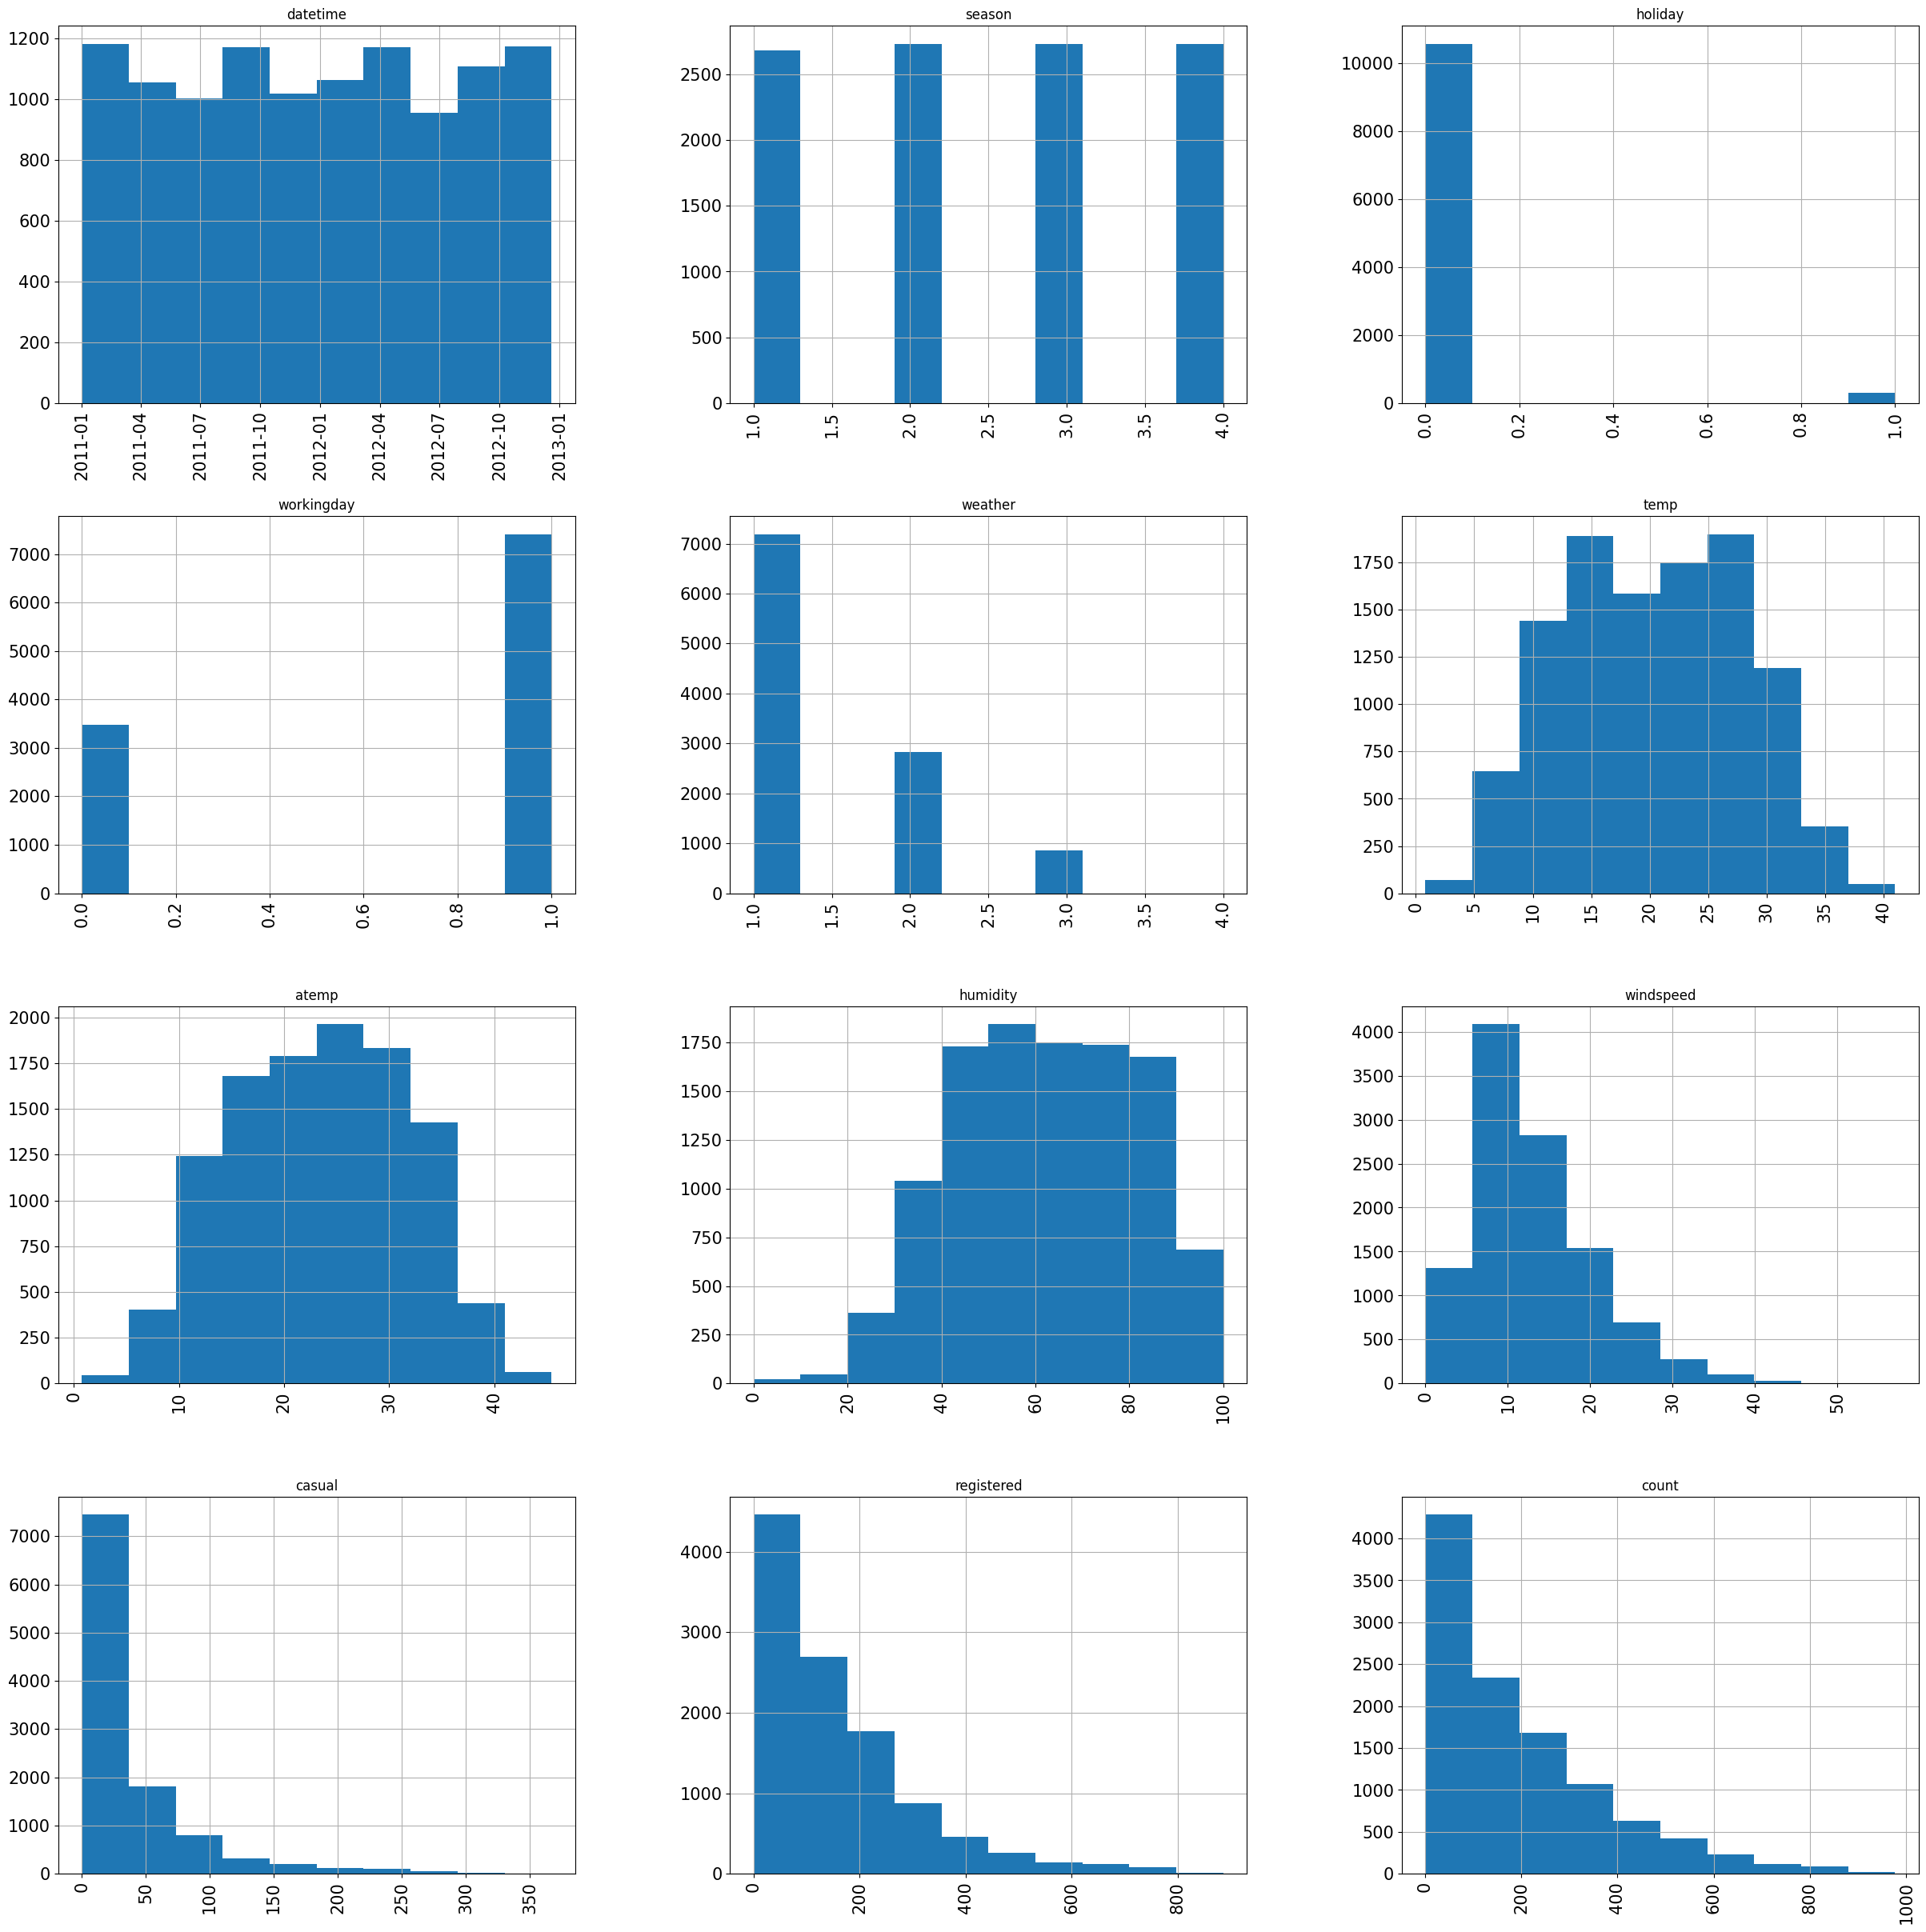

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist( grid=True, xlabelsize = 15,ylabelsize = 15, figsize = (30, 30),xrot = 90 );

In [ ]:
# create a new feature
train["day"] = train["datetime"].map(lambda p: p.day)
train["month"] = train["datetime"].map(lambda p: p.month)
train["hour"] = train["datetime"].map(lambda p: p.hour)

# test[?] = ?
test["day"] = test["datetime"].map(lambda p: p.day)
test["month"] = test["datetime"].map(lambda p: p.month)
test["hour"] = test["datetime"].map(lambda p: p.hour)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


Here , I have created 3 new features from datetime feature. They are, 
  * day
  * month
  * hour

Therefore, now `datetime` is redundant. So, I remove the `datetime` feature.

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train.season.astype("category")
train["weather"] = train.season.astype("category")
test["season"] = train.season.astype("category")
test["weather"] = train.season.astype("category")

In [ ]:
train.season.astype("category")

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


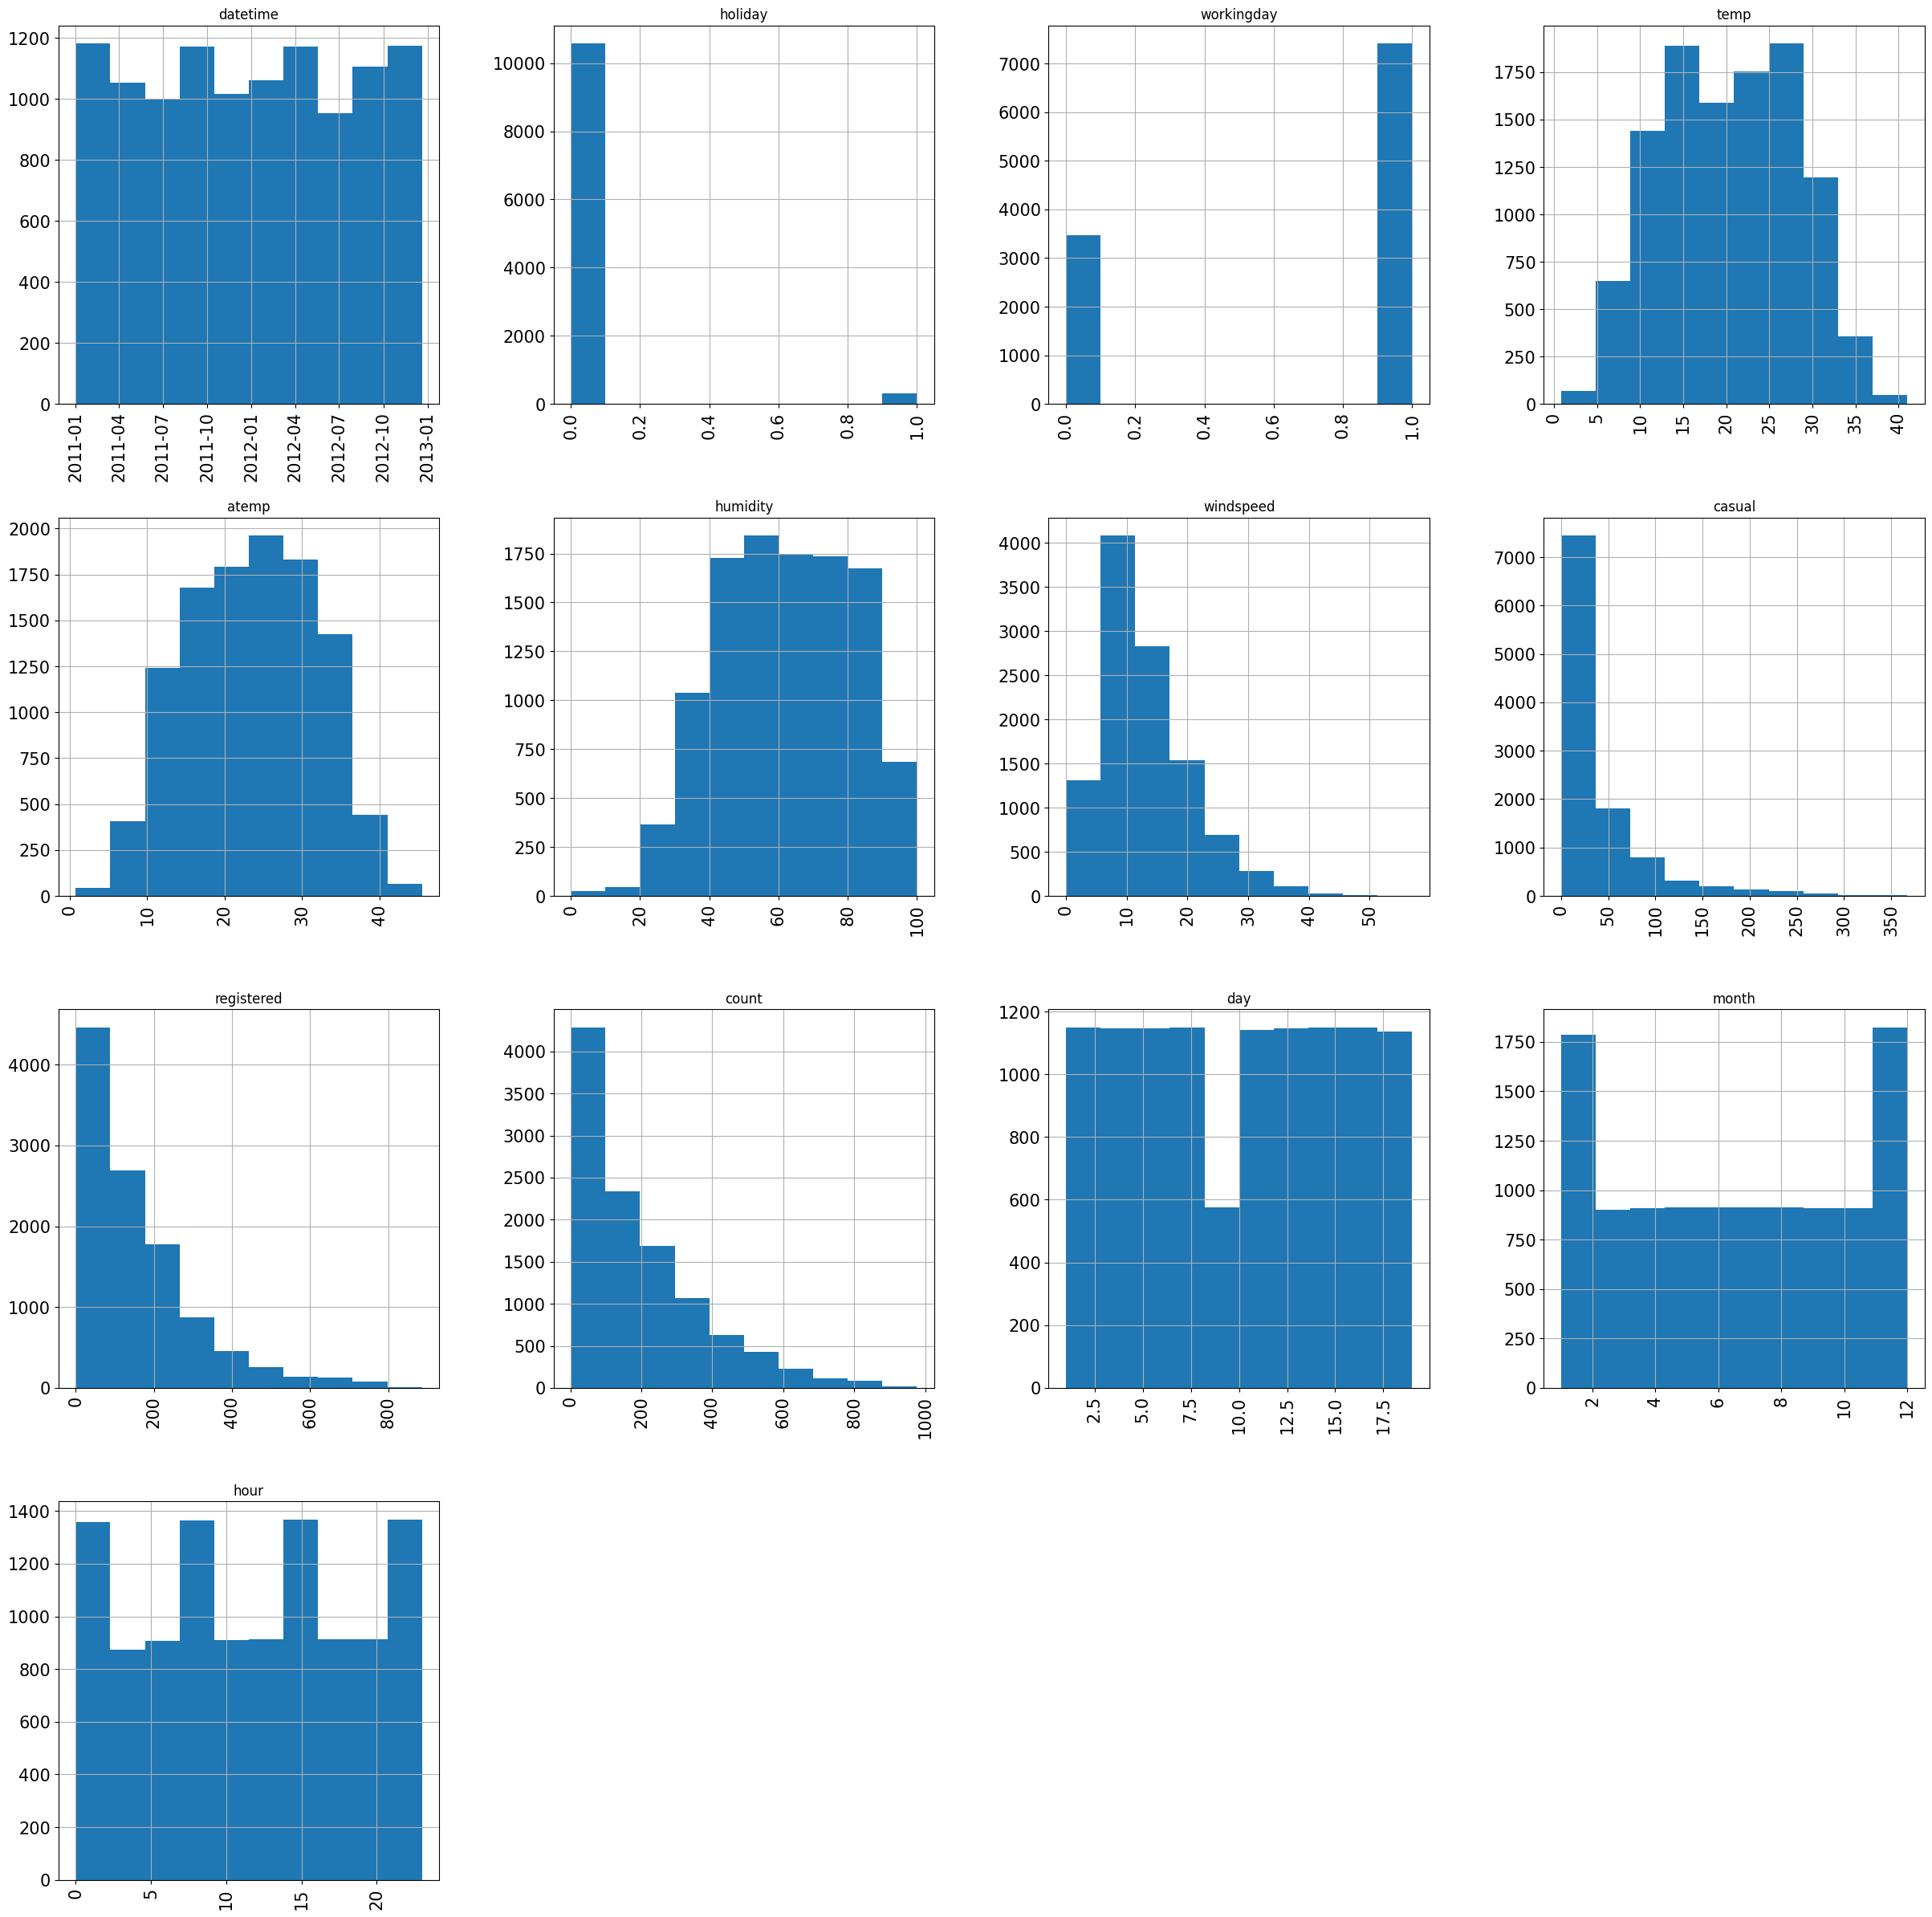

In [ ]:
# View histogram of all features again now with the hour feature
train.hist( grid=True, xlabelsize = 15,ylabelsize = 15, figsize = (30, 30),xrot = 90);

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
train.drop(["casual","registered"], axis = 1).head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,1,4


In [ ]:
predictor_new_features = TabularPredictor(
    label = "count",
    eval_metric = "root_mean_squared_error"
).fit(
    train_data = train.drop(["casual","registered"], axis = 1),
    time_limit = 600, 
    presets = "best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230607_103933/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230607_103933/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.876823      83.269585  527.101891                0.001293           0.394172            3       True         12
1          LightGBM_BAG_L2  -31.083730      81.272523  426.460281                0.504209          40.877582            2       True          9
2        LightGBMXT_BAG_L2  -31.805556      82.529471  441.309524                1.761157          55.726825            2       True          8
3   RandomForestMSE_BAG_L2  -32.864220      81.477069  433.827468                0.708755          48.244769            2       True         10
4          CatBoost_BAG_L2  -32.872344      81.002926  430.103312                0.234612          44.520613            2       True         11
5      WeightedEnsemble_L2  -33.721809      80.683408  386.247364         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -35.59209971623112,
  'LightGBM_BAG_L1': -35.30483029160342,
  'RandomForestMSE_BAG_L1': -40.79120002156691,
  'CatBoost_BAG_L1': -40.700597581517556,
  'WeightedEnsemble_L2': -33.72180888153884,
  'LightGBMXT_BAG_L2'

In [ ]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.describe()

count    6493.000000
mean      151.684677
std       132.265976
min         3.299071
25%        49.416416
50%       119.169563
75%       212.868774
max       814.116211
Name: count, dtype: float64

There are no negative values, in the prediction.

In [ ]:
submission_new_features = pd.DataFrame()

In [ ]:
test.head()

In [ ]:
submission_new_features["datetime"] = submission["datetime"]

In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,23.864491
1,2011-01-20 01:00:00,42.542660
2,2011-01-20 02:00:00,45.927879
3,2011-01-20 03:00:00,49.381340
4,2011-01-20 04:00:00,51.971848


In [ ]:
# Same submitting predictions
# submission_new_features = submission_new_features
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,17.598572
1,2011-01-20 01:00:00,11.540849
2,2011-01-20 02:00:00,10.811188
3,2011-01-20 03:00:00,9.375758
4,2011-01-20 04:00:00,8.632360


In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

/usr/local/lib/python3.10/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (4.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
100% 188k/188k [00:01<00:00, 112kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/usr/local/lib/python3.10/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (4.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
fileName                     date                 description                      status    publicScore  privateScore  
---------------------------  -------------------  -------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-07 10:53:12  new features                     complete  0.66995      0.66995       
submission.csv               2023-06-07 10:39:20  first raw submission             complete  1.80812      1.80812       
submission_new_features.csv  2023-06-07 07:51:55  new features - 5
                complete  0.66816      0.66816       


#### New Score of `0.66995`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.137203      36.766311  536.039080                0.001366           0.414509            3       True         12
1   RandomForestMSE_BAG_L2  -53.491091      26.862020  401.469748                0.990054          48.244486            2       True         11
2          LightGBM_BAG_L2  -54.967739      26.483922  390.073934                0.611957          36.848672            2       True         10
3        LightGBMXT_BAG_L2  -60.372020      35.162934  450.531414                9.290968          97.306151            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.071287    0.063140                0.071287           0.063140            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.072202    0.503582         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.8924116050023,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble_

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.876823      83.269585  527.101891                0.001293           0.394172            3       True         12
1          LightGBM_BAG_L2  -31.083730      81.272523  426.460281                0.504209          40.877582            2       True          9
2        LightGBMXT_BAG_L2  -31.805556      82.529471  441.309524                1.761157          55.726825            2       True          8
3   RandomForestMSE_BAG_L2  -32.864220      81.477069  433.827468                0.708755          48.244769            2       True         10
4          CatBoost_BAG_L2  -32.872344      81.002926  430.103312                0.234612          44.520613            2       True         11
5      WeightedEnsemble_L2  -33.721809      80.683408  386.247364         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -35.59209971623112,
  'LightGBM_BAG_L1': -35.30483029160342,
  'RandomForestMSE_BAG_L1': -40.79120002156691,
  'CatBoost_BAG_L1': -40.700597581517556,
  'WeightedEnsemble_L2': -33.72180888153884,
  'LightGBMXT_BAG_L2'

In [ ]:
# Hyperparameters Dictionary
hyperparameters = {
    "GBM":{"learning_rate":0.05, "num_iterations":120}, # decrease learning_rate from 0.1 > 0.05, Increase iterations from 100 < 120
    "CAT":{"learning_rate":0.01, "depth":8},
   "RF":{"n_estimators":120}
    
}


In [ ]:
predictor_new_hpo = TabularPredictor(
    label = "count",
    eval_metric = "root_mean_squared_error",
    
  
).fit(
    train_data = train.drop(["casual", "registered"], axis = 1),
    time_limit = 600,
    presets = "best_quality",
    hyperparameters = hyperparameters
    
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230607_105314/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230607_105314/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 12
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -37.391093       1.713361  558.102615                0.001608           0.391826            3       True          8
1      CatBoost_BAG_L2 -37.752616       1.111473  514.593762                0.181208         168.747969            2       True          7
2  WeightedEnsemble_L2 -37.848420       0.637748  315.133816                0.001102           0.398939            2       True          4
3      LightGBM_BAG_L2 -37.894920       1.107702  374.563731                0.177437          28.717938            2       True          5
4  RandomForest_BAG_L2 -38.213376       1.353108  360.244883                0.422843          14.399090            2       True          6
5      CatBoost_BAG_L1 -38.665972       0.299569  307.056138                0.299569         307.056138 

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -42.19305374327768,
  'RandomForest_BAG_L1': -41.01208552529237,
  'CatBoost_BAG_L1': -38.66597242102828,
  'WeightedEnsemble_L2': -37.8484198096812,
  'LightGBM_BAG_L2': -37.894919876537585,
  'RandomForest_BAG_L2': -38.21337603319993,
  'CatBoost_BAG_L2': -37.75261588046569,
  'WeightedEnsemble_L3': -37.39109334550015},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': 'AutogluonModels/ag-20230607_105314/models/LightGBM_BAG_L1/',
  'RandomForest_BAG_L1': 'AutogluonModels/ag-20230607_105314/models/Rand

In [ ]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
(predictions_new_hpo < 0).sum()


0

In [ ]:
submission_new_hpo = pd.DataFrame()
submission_new_hpo["datetime"] = submission["datetime"]

In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

/usr/local/lib/python3.10/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (4.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
100% 188k/188k [00:01<00:00, 188kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

/usr/local/lib/python3.10/dist-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (4.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-07 11:05:41  new features with hyperparameters  complete  0.48124      0.48124       
submission_new_features.csv  2023-06-07 10:53:12  new features                       complete  0.66995      0.66995       
submission.csv               2023-06-07 10:39:20  first raw submission               complete  1.80812      1.80812       
submission_new_features.csv  2023-06-07 07:51:55  new features - 5


#### New Score of `0.48124`

<Axes: xlabel='model'>

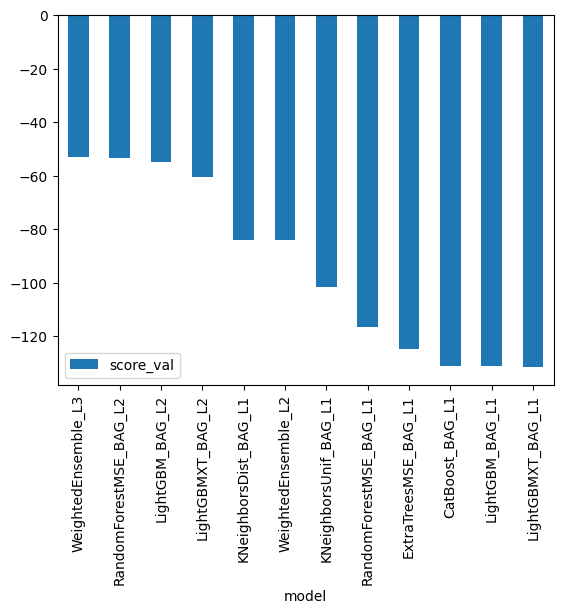

In [ ]:
# Output model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

<Axes: xlabel='model'>

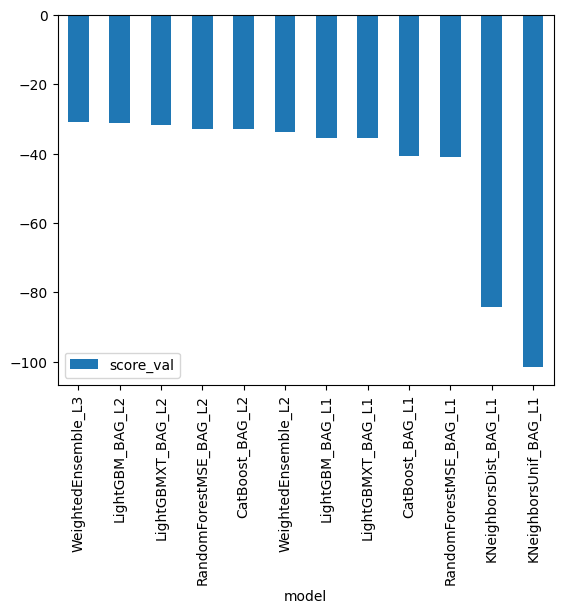

In [ ]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

<Axes: xlabel='model'>

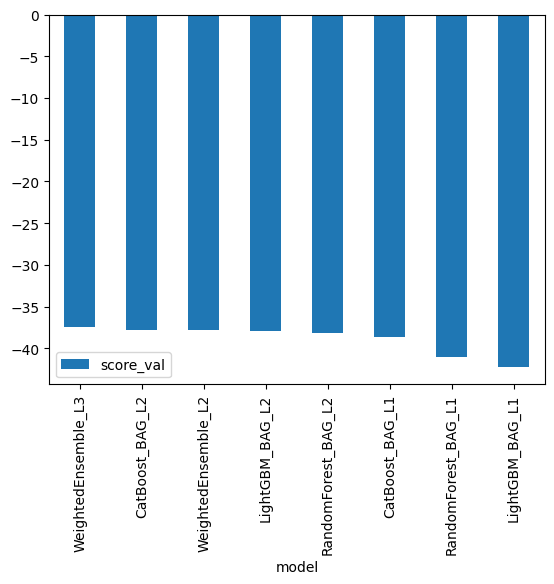

In [ ]:
predictor_new_hpo.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

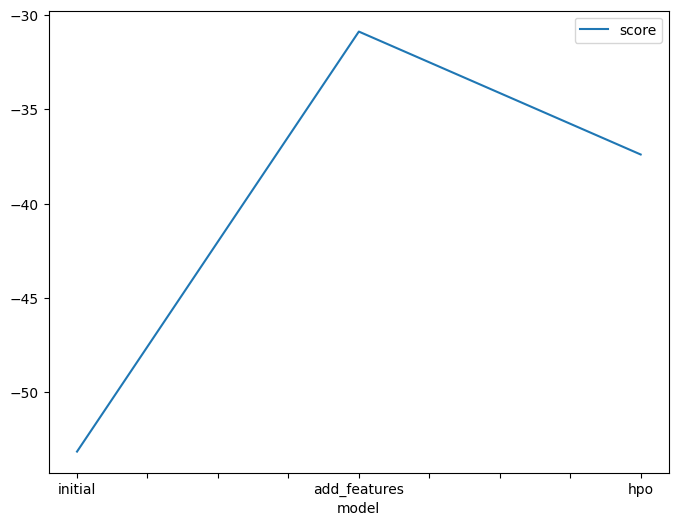

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.137203, -30.876823, -37.391093]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

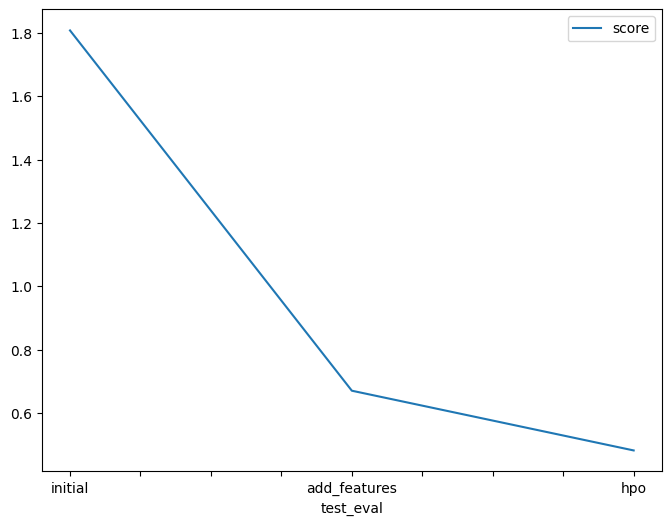

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80812, 0.66995, 0.48124]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "GBM": ["Default", "Default", "learning_rate = 0.05, num_iteration = 120"],
    "CAT": ["Default", "Default", "learning_rate = 0.01, depth = 8"],
    "RF": ["Default", "Default", "n_estimators = 120"],
    "score": [1.80812, 0.66995, 0.48124]
})

,model,GBM,CAT,RF,score
0,initial,Default,Default,Default,1.80812
1,add_features,Default,Default,Default,0.66995
2,hpo,"learning_rate = 0.05, num_iteration = 120","learning_rate = 0.01, depth = 8",n_estimators = 120,0.48124


In [ ]:
!ls

AutogluonModels		       README.md
bike-sharing-demand.zip        report-template.md
bike-sharing-prediction.ipynb  sampleSubmission.csv
img			       submission.csv
model_test_score.png	       submission_new_features.csv
model_train_score.png	       submission_new_hpo.csv
predictor_1_new_features.pkl   test.csv
predictor_1.pkl		       train.csv
